In [5]:
import pandas as pd

df = pd.read_csv(r"C:\Users\workk\Downloads\holidays_events.csv")
print(df.columns)



Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')


C:\Users\workk\AppData\Local\Temp\ipykernel_17212\4132546534.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.resample('M').size()


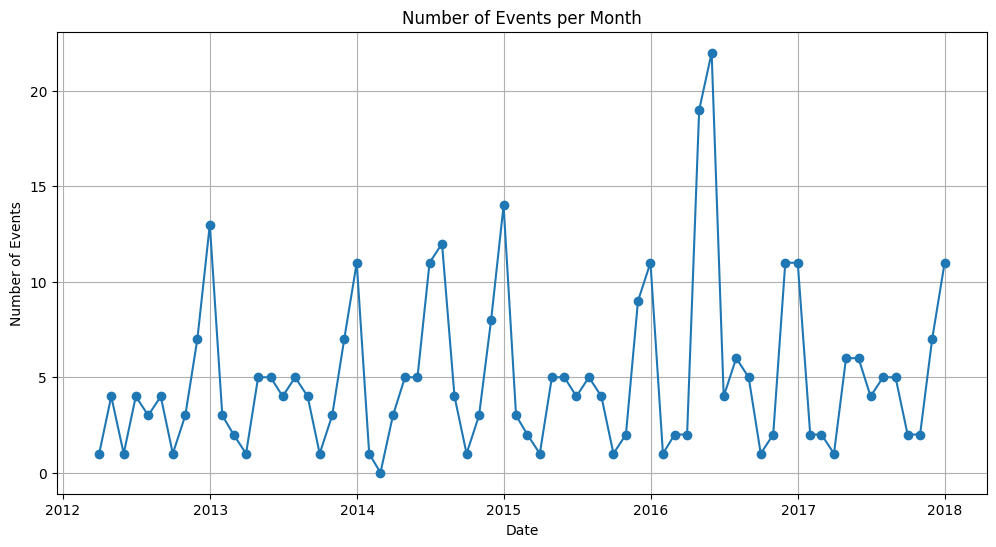

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\workk\Downloads\holidays_events.csv", parse_dates=['date'])
df.set_index('date', inplace=True)
monthly_counts = df.resample('M').size()
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts, marker='o', linestyle='-')
plt.title("Number of Events per Month")
plt.xlabel("Date")
plt.ylabel("Number of Events")
plt.grid(True)
plt.show()


In [7]:
import numpy as np
np.random.seed(42)
sales_df = pd.DataFrame({
    'date': pd.date_range(start='2013-01-01', end='2017-08-15', freq='D'),
})
sales_df['sales'] = 100 + np.random.normal(0, 10, len(sales_df)).cumsum()

sales_df.set_index('date', inplace=True)


C:\Users\workk\AppData\Local\Temp\ipykernel_17212\986892031.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = sales_df['sales'].resample('M').mean()


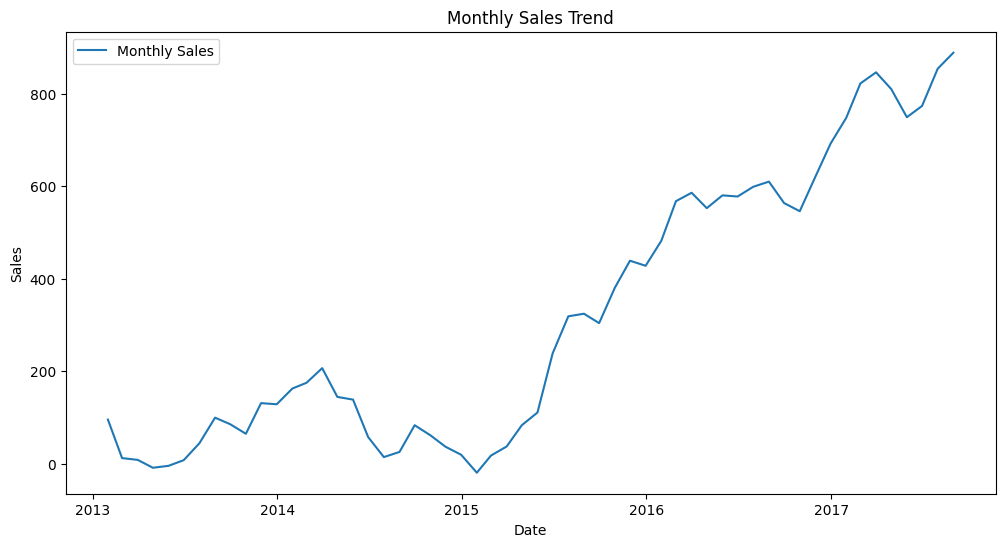

In [8]:
monthly_sales = sales_df['sales'].resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Monthly Sales')
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


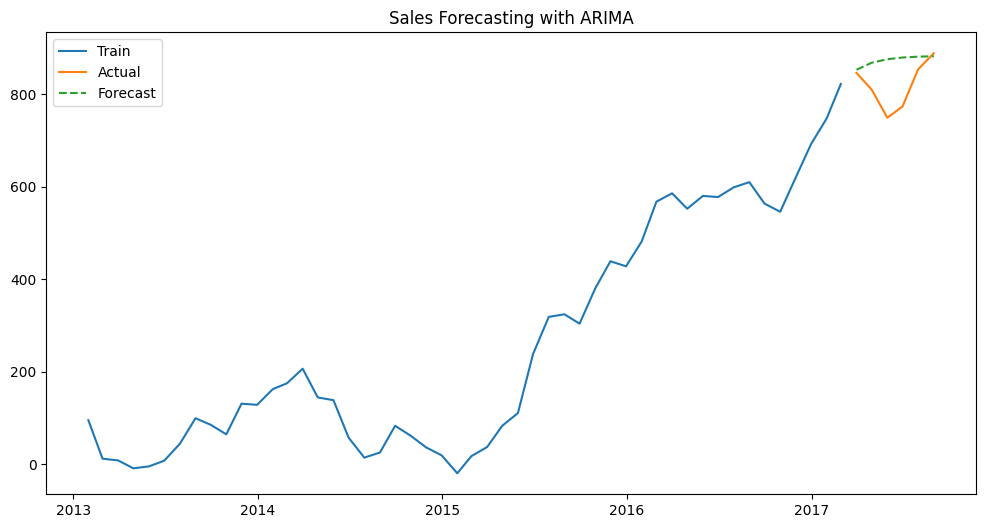

In [9]:
from statsmodels.tsa.arima.model import ARIMA
train = monthly_sales[:-6]
test = monthly_sales[-6:]
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=6)
forecast.index = test.index
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title("Sales Forecasting with ARIMA")
plt.legend()
plt.show()


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 72.35
MAE: 55.13
